**Import Statements**

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import sys
from matplotlib import pyplot as plt
import keras
from keras.datasets import mnist
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dense, Dropout, Flatten
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import BatchNormalization

print ("imports complete . . .")

imports complete . . .


Initialize Parameters here

In [0]:
epoch_cifar = 40
epoch_mnist = 30
lr_cifar = 0.01
batch_size_mnist = 64
batch_size_cifar = 64
# input image dimensions
input_shape_MNIST = (28, 28, 1)

Normalize Data


In [0]:
def normalizer(train, test):
    train_norm = train.astype('float32')/ 255.0
    test_norm = test.astype('float32') / 255.0
    print("Data Normalized . . .")

    return train_norm, test_norm


Define CNN model for CIFAR

In [0]:
def model_CIFAR():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
    model.add(BatchNormalization())
    
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(BatchNormalization())    
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.2))
    
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(BatchNormalization())
    
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(BatchNormalization())    
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.3))
    
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(BatchNormalization())
    
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.4))
    model.add(Flatten())
    
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    
    model.add(Dense(10, activation='softmax'))

    # compile model
    opt = SGD(lr=lr_cifar, momentum=0.9)
    model.compile(optimizer=opt, loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

    print ("Modelling Complete . . .")
    return model

Define CNN model for MNIST

In [0]:
def model_MNIST():
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape_MNIST))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation='softmax'))

    opt = keras.optimizers.Adadelta()
    model.compile(loss=keras.losses.categorical_crossentropy, optimizer=opt, metrics=['accuracy'])
    return model

Train and evaluate the Model CIFAR

In [0]:
def train_CNN_CIFAR():
    # load data
    (trainX, trainY), (testX, testY) = cifar10.load_data()
    # one hot encoding
    trainY = to_categorical(trainY)
    testY = to_categorical(testY)
    print("Datasets loaded . . .")

    trainX, testX = normalizer(trainX, testX)
    
    model = model_CIFAR()

    # # create data generator
    # datagenerator = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)    
    # train_itr = datagenerator.flow(trainX, trainY, batch_size=64)
    # steps = int(trainX.shape[0] / 32)
    # history = model.fit_generator(train_itr, steps_per_epoch=steps, epochs=epoch_cifar, validation_data=(testX, testY), verbose=1)
    
    # fit the model
    print ("Training Started . . .")
    history = model.fit(trainX, trainY, batch_size=batch_size_cifar, epochs=epoch_cifar, verbose=1, validation_data=(testX, testY))
    model.save("CIFAR_model.pickle")
    # evaluate model
    score = model.evaluate(testX, testY, verbose=0)
    print ('Model Evaluation > CIFAR Dataset :-')
    print('Test Loss : %.3f' % (score[0] * 100.0))
    print('Test Accuracy : %.3f'% (score[1] * 100))
    # Plotting
    plot_summary(history,'CIFAR')

Train and evaluate the Model MNIST

In [0]:
def train_CNN_MNIST():
    # load data
    (trainX, trainY), (testX, testY) = mnist.load_data()

    trainX = trainX.reshape(trainX.shape[0], input_shape_MNIST[0], input_shape_MNIST[1], input_shape_MNIST[2])
    testX = testX.reshape(testX.shape[0], input_shape_MNIST[0], input_shape_MNIST[1], input_shape_MNIST[2])

    trainX, testX = normalizer(trainX, testX)

    # one hot encoding
    trainY = to_categorical(trainY)
    testY = to_categorical(testY)

    model = model_MNIST()

    # fit the model
    print("Training Started . . .")
    history = model.fit(trainX, trainY, batch_size=batch_size_mnist, epochs=epoch_mnist, verbose=1, validation_data=(testX, testY))
    model.save("MNIST_model.pickle")
    # evaluate model
    score = model.evaluate(testX, testY, verbose=0)

    print('Model Evaluation > MNIST Dataset :-')
    print('Test Loss : %.3f' % (score[0] * 100.0))
    print('Test Accuracy : %.3f' % (score[1] * 100))
    # print(history.history.keys())
    plot_summary(history, "MNIST")

Plotting

In [0]:
def plot_summary(history, name):
    # summarize history for accuracy
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('Accuracy <'+name+'>')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    plt.savefig(name+"_accuracy.png")
    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Loss <'+name+'>')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    plt.savefig(name+"_loss.png")

Execution

Data Normalized . . .
Training Started . . .
Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 12s 193us/step - loss: 0.2138 - acc: 0.9352 - val_loss: 0.0537 - val_acc: 0.9824
Epoch 2/30
60000/60000 [==============================] - 7s 123us/step - loss: 0.0790 - acc: 0.9767 - val_loss: 0.0394 - val_acc: 0.9872
Epoch 3/30
60000/60000 [==============================] - 7s 124us/step - loss: 0.0600 - acc: 0.9818 - val_loss: 0.0364 - val_acc: 0.9883
Epoch 4/30
60000/60000 [==============================] - 7s 122us/step - loss: 0.0503 - acc: 0.9850 - val_loss: 0.0309 - val_acc: 0.9887
Epoch 5/30
60000/60000 [==============================] - 7s 121us/step - loss: 0.0441 - acc: 0.9867 - val_loss: 0.0270 - val_acc: 0.9910
Epoch 6/30
60000/60000 [==============================] - 7s 122us/step - loss: 0.0413 - acc: 0.9879 - val_loss: 0.0270 - val_acc: 0.9916
Epoch 7/30
60000/60000 [==============================] - 7s 123us/step - lo

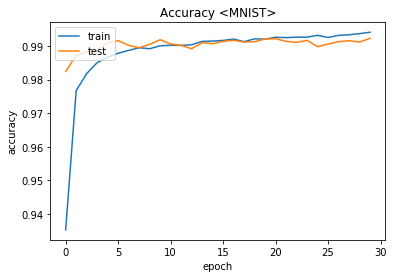

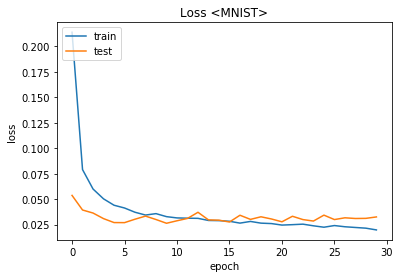

Datasets loaded . . .
Data Normalized . . .
Modelling Complete . . .
Training Started . . .
Train on 50000 samples, validate on 10000 samples
Epoch 1/40
50000/50000 [==============================] - 17s 335us/step - loss: 1.5947 - acc: 0.4246 - val_loss: 1.4677 - val_acc: 0.4815
Epoch 2/40
50000/50000 [==============================] - 12s 236us/step - loss: 1.2148 - acc: 0.5629 - val_loss: 1.1381 - val_acc: 0.5841
Epoch 3/40
50000/50000 [==============================] - 12s 235us/step - loss: 1.0396 - acc: 0.6309 - val_loss: 0.9408 - val_acc: 0.6585
Epoch 4/40
50000/50000 [==============================] - 12s 234us/step - loss: 0.9260 - acc: 0.6739 - val_loss: 0.8384 - val_acc: 0.7057
Epoch 5/40
50000/50000 [==============================] - 12s 234us/step - loss: 0.8477 - acc: 0.7028 - val_loss: 0.8839 - val_acc: 0.6911
Epoch 6/40
50000/50000 [==============================] - 12s 233us/step - loss: 0.7910 - acc: 0.7237 - val_loss: 0.7830 - val_acc: 0.7261
Epoch 7/40
50000/50000 [

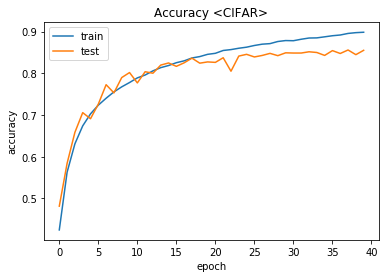

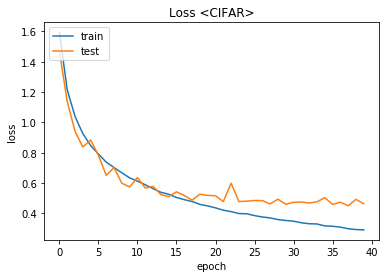

<Figure size 432x288 with 0 Axes>

In [0]:
def train_CNN():
    train_CNN_MNIST()
    train_CNN_CIFAR()

train_CNN()